# Geometric Algebra For Conics in Python
This notebook is an experiment in doing calculations with the Geometric Algebra for Conics of Perwass/Hrdina, Navrat and Vasik 

In [1]:
from clifford.gac import *
from clifford import MVArray
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# These constants map between the infinities defined by Perwass and
# those defined by Hrdina, Navrat and Vasik
nx = n3
nxb = n3b
nm = 0.5*(n2 - n1)
nmb = (n2b - n1b)
n = 0.5*(n2 + n1)
nb = (n2b + n1b)

# The 8D pseudoscalar
I8 = e12345678
# Other pseudoscalars
Ioi = nb*nmb*nxb*e1*e2*n
Iio = nb*e1*e2*n*nm*nx

def normalise_conic(con):
    """
    Normalises an op rep conic so it squares to +-1
    """
    fullcon = (con^(n1b - n2b)^n3b)
    return con/np.sqrt(abs((fullcon*~fullcon)[0]))

def rand_dp():
    """
    Generates a random point on the e1 e2 plane
    """
    return np.random.randn()*e1 + np.random.randn()*e2

def random_conic():
    """
    Generates a random conic from the outer product of 5 random points
    """
    return normalise_conic(MVArray([up(rand_dp()) for _ in range(5)]).op())

def to_ip_rep(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    Converts an opns conic to an ipns conic
    """
    return (con^n2b^nxb)*e12345678

def to_op_rep(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    Converts an ipns conic to an opns conic
    """
    return (con^n2^nx)*e12345678

def generate_ipn_func(con):
    """
    This uses Hrdina, Navrat and Vasiks concept of the ipns and opns
    It generates a function that evaluates the inner product of a point
    with a given conic, used in the visualisation function
    """
    ipncon = to_ip_rep(con)
    def ipn_func(x, y):
        return (up(x*e1 + y*e2)|ipncon)[0]
    return ipn_func

def visualise_conic(xs, ys, con):
    ipn_func_con = generate_ipn_func(con)
    img = np.zeros((len(xs),len(ys)))
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            img[j,i] = ipn_func_con(x, y)
    return img

def normalise_n_minus_1(p):
    pnew = p(1)
    pnew = -pnew/(pnew|n)[0]
    return up((down(pnew)))

def full_opns(con):
    return con^(n1b - n2b)^n3b

## Conics are made from the outer product of points
The up(x) function embeds a point into the conic space

In [3]:
rand_down_points = MVArray([rand_dp() for _ in range(5)])
rand_up_points = MVArray([up(p) for p in rand_down_points])
rand_con = normalise_conic(rand_up_points.op())

print(rand_up_points[0])
print( (full_opns(rand_con)*rand_up_points[0]*full_opns(rand_con)) )
print( (full_opns(rand_con)*rand_up_points[0]*full_opns(rand_con))|n )

-(1.24287^e1) + (0.39018^e2) + (0.27236^e3) - (0.42388^e4) - (0.48494^e5) + (1.27236^e6) + (0.57612^e7) - (0.48494^e8)
-(1.24287^e1) + (0.39018^e2) + (0.27236^e3) - (0.42388^e4) - (0.48494^e5) + (1.27236^e6) + (0.57612^e7) - (0.48494^e8)
-1.0


## You can render conics and the points that they are formed from

<IPython.core.display.Javascript object>


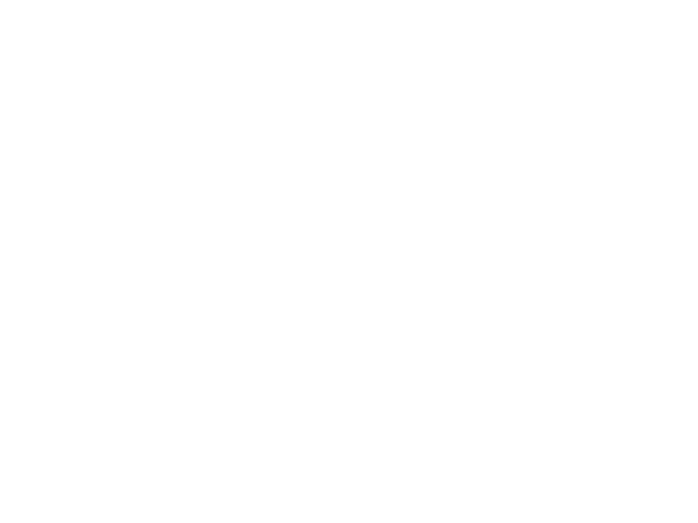

0


In [4]:
%matplotlib notebook
plt.figure()
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
plt.contour(xs, ys, img1, [0])
xpoints,ypoints = zip(*rand_down_points.value[:,1:3])
plt.plot(xpoints,ypoints,'+r')

ptest = up(rand_dp())
ref = ((rand_con^(n1b - n2b)^n3b)*ptest*(rand_con^(n1b - n2b)^n3b))
print(ref*ref)
refres = -ref/(ref|n)

p0x, p0y = ptest.value[1:3]
plt.plot(p0x,p0y,'+g')

p0x, p0y = refres.value[1:3]
plt.plot(p0x,p0y,'+g')

In [5]:
ptest = up(rand_dp())
print(ptest)
ref = ((rand_con^(n1b - n2b)^n3b)*rand_up_points[0]*(rand_con^(n1b - n2b)^n3b))
-ref/(ref|n)

(1.22902^e1) + (1.2282^e2) + (0.25524^e3) + (0.25423^e4) + (1.50947^e5) + (1.25524^e6) + (1.25423^e7) + (1.50947^e8)


-(1.24287^e1) + (0.39018^e2) + (0.27236^e3) - (0.42388^e4) - (0.48494^e5) + (1.27236^e6) + (0.57612^e7) - (0.48494^e8)

In [6]:
rand_up_points[0]

-(1.24287^e1) + (0.39018^e2) + (0.27236^e3) - (0.42388^e4) - (0.48494^e5) + (1.27236^e6) + (0.57612^e7) - (0.48494^e8)

## You can also render multiple conics on the same image

<IPython.core.display.Javascript object>


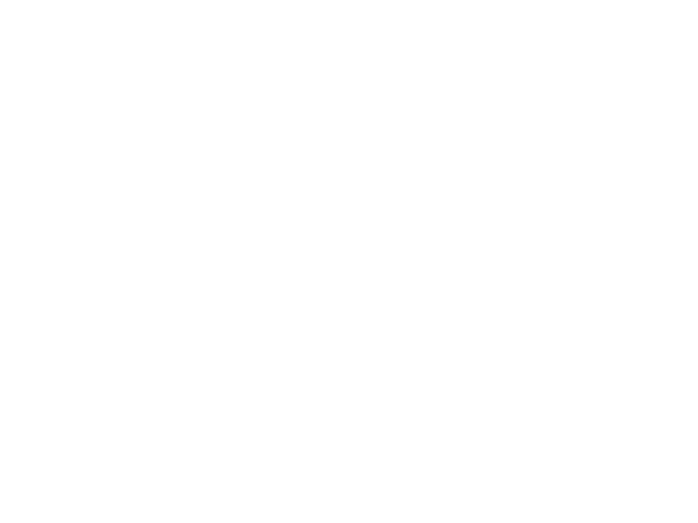

In [7]:
%matplotlib notebook
plt.figure()
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
rand_con_2 = random_conic()
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

In [8]:
m0 = layout.get_grade_projection_matrix(0)
m1 = layout.get_grade_projection_matrix(1)
m6 = layout.get_grade_projection_matrix(6)
opmat = m6@layout.get_left_gmt_matrix(rand_con)@m1

In [9]:
# ipmat = np.vstack((m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con))@m1,
#                                       m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con_2))@m1))

ipmat = np.vstack((m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con))@m1,
                                      m0@layout.get_left_gmt_matrix(to_ip_rep(rand_con_2))@m1))

In [10]:

refmat = m1@layout.get_left_gmt_matrix(full_opns(rand_con_2))@layout.get_right_gmt_matrix(rand_con_2^(n1b - n2b)^n3b)@m1@layout.get_left_gmt_matrix(rand_con^(n1b - n2b)^n3b)@layout.get_right_gmt_matrix(rand_con^(n1b - n2b)^n3b)@m1

In [11]:
u, s, vh = np.linalg.svd(refmat)
print(u.shape)
print(s.shape)
print(vh.shape)

(256, 256)
(256,)
(256, 256)


In [12]:
def get_intersection(cons, start=up(0*e1)):
    pnow = start
    for c in cons:
        conop = (c^(n1b - n2b)^n3b)
        pnew = conop*pnow*conop
        pnow = normalise_n_minus_1(pnew)
    return pnow

<IPython.core.display.Javascript object>


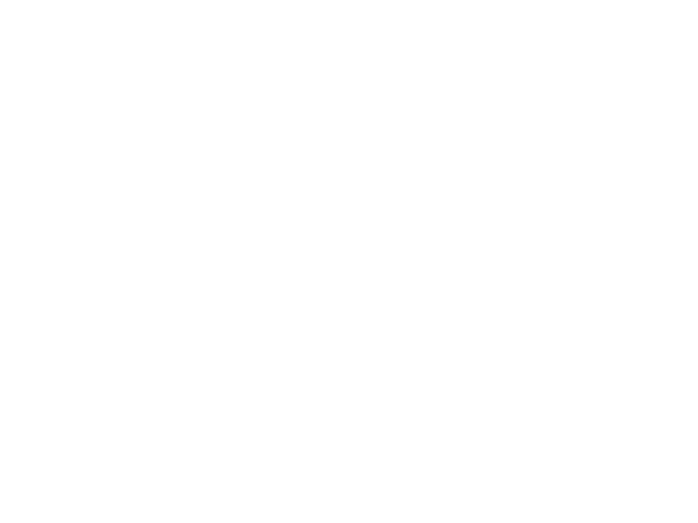

(-2, 2)

In [13]:
%matplotlib notebook
plt.figure()

# rand_con_3 = random_conic()

pnow = up(0*e2)
for i in range(1000):
    pnow = get_intersection([rand_con, rand_con_2], start=pnow)
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)
# img3 = visualise_conic(xs, ys, rand_con_3)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])
# plt.contour(xs, ys, img3, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))

<IPython.core.display.Javascript object>


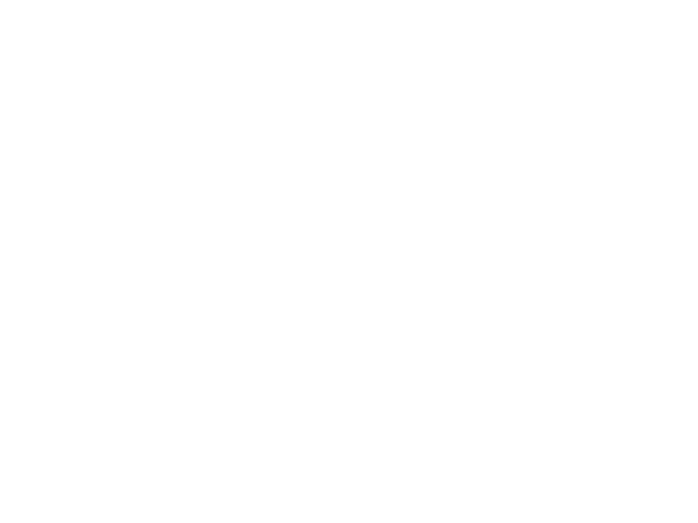

0


(-2, 2)

In [14]:
%matplotlib notebook
plt.figure()

conp = normalise_conic(rand_con + rand_con_2)
conm = normalise_conic(rand_con - rand_con_2)
print( conp|conm )


xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, conp)
img2 = visualise_conic(xs, ys, conm )
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

pnow = up(0*e2)
for i in range(1000):
    pnow = get_intersection([conp, conm], start=pnow)
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')

plt.xlim((-2,2))
plt.ylim((-2,2))



<IPython.core.display.Javascript object>


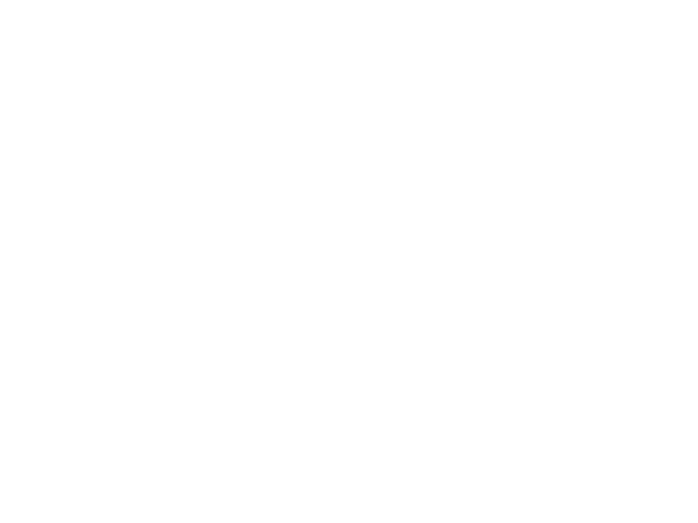

0.0
-0.19234505287369705
(1.17866^e1) - (3.11336^e2) + (0.19462^e3) + (4.34651^e4) - (3.6696^e5) + (1.19462^e6) + (5.34651^e7) - (3.6696^e8)
0.1923450528736968
(3.09305^e1) + (1.53161^e2) + (4.28347^e3) + (0.67291^e4) + (4.73733^e5) + (5.28347^e6) + (1.67291^e7) + (4.73733^e8)
1.0000000000000004
(1.38548^e1) - (2.61155^e2) + (0.45978^e3) + (2.91009^e4) - (3.61824^e5) + (1.45978^e6) + (3.91009^e7) - (3.61824^e8)
0.9999999999999997
(10.66381^e1) + (2.86995^e2) + (56.35846^e3) + (3.61831^e4) + (30.60462^e5) + (57.35846^e6) + (4.61831^e7) + (30.60462^e8)
1.0000000000000007
-(7.22385^e1) - (3.45202^e2) + (25.59201^e3) + (5.45824^e4) + (24.93691^e5) + (26.59201^e6) + (6.45824^e7) + (24.93691^e8)
0.9999999999999999
-(2.75729^e1) - (1.69451^e2) + (3.30132^e3) + (0.93568^e4) + (4.67225^e5) + (4.30132^e6) + (1.93568^e7) + (4.67225^e8)
1.0
(0.13509^e1) - (0.24272^e2) - (0.49088^e3) - (0.47054^e4) - (0.03279^e5) + (0.50912^e6) + (0.52946^e7) - (0.03279^e8)
1.0000000000000002
(0.64162^e1) - (0.8208

In [15]:
%matplotlib notebook
plt.figure()

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2)

plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])

plt.xlim((-2,2))
plt.ylim((-2,2))

refleft = layout.get_left_gmt_matrix(full_opns(rand_con))@layout.get_right_gmt_matrix(full_opns(rand_con))
refright = layout.get_left_gmt_matrix(full_opns(rand_con_2))@layout.get_right_gmt_matrix(full_opns(rand_con_2))
reffull = (0.5*refleft + 0.5*refright)@m1
print( np.linalg.det(reffull) )

bk1 = up(1*e2).value
for i in range(1000):
    bk1 = reffull@bk1
    pnow = normalise_n_minus_1(0.5*pnow + 0.5*normalise_n_minus_1(layout.MultiVector(value=bk1)))
    bk1 = pnow.value
    x, y = (pnow).value[1:3]
    plt.plot([x],[y],'+r')
    
w,v = np.linalg.eig(reffull)
for i in range(256):
    if abs(np.real(w[i])) > 0.01:
        print(w[i])
        explicit_val = normalise_n_minus_1(layout.MultiVector(value=np.real(v[:,i])))
        print(explicit_val)
        x, y = (explicit_val).value[1:3]
        plt.plot([-x],[-y],'+b')

In [16]:
(to_ip_rep(rand_con)^to_ip_rep(rand_con_2))**2

-0.12694

In [17]:
(to_ip_rep(conm)^to_ip_rep(conp))**2

-0.13182

<IPython.core.display.Javascript object>


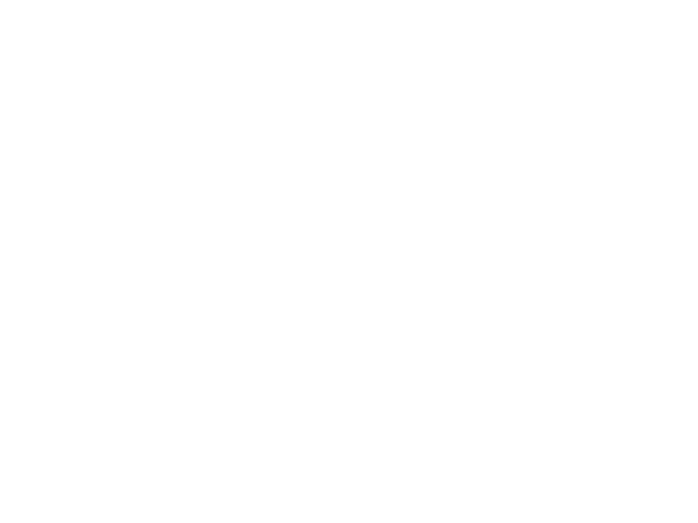

(-2, 2)

In [18]:
%matplotlib notebook
plt.figure()

rand_con = random_conic()
rand_con_2 = random_conic()

c1 = np.array([0.0,1.0,0.0])
c2 = np.array([1.0,0.0,0.0])
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, rand_con)
img2 = visualise_conic(xs, ys, rand_con_2 )
plt.contour(xs, ys, img1, [0], colors=[c1])
plt.contour(xs, ys, img2, [0], colors=[c2])

pnow = up(0.0*e1)
for alpha in np.linspace(0,1,5):
    conint = ((1-alpha)*rand_con + alpha*rand_con_2)
    img = visualise_conic(xs, ys, conint)
    plt.contour(xs, ys, img, [0], colors=[(1-alpha)*c1 + alpha*c2])

plt.xlim((-2,2))
plt.ylim((-2,2))



In [19]:
meetval = to_op_rep((to_ip_rep(rand_con)^to_ip_rep(rand_con_2)))
meetval

-(0.01105^e1234) + (0.20642^e1235) - (0.33336^e1236) - (0.01105^e1237) + (0.20642^e1238) - (0.1698^e1245) + (0.25937^e1246) - (0.1698^e1248) + (0.27755^e1256) + (0.1698^e1257) - (0.25937^e1267) - (0.27755^e1268) - (0.1698^e1278) - (0.11664^e1345) + (0.18102^e1346) - (0.11664^e1348) + (0.13747^e1356) + (0.11664^e1357) - (0.18102^e1367) - (0.13747^e1368) - (0.11664^e1378) + (0.04376^e1456) - (0.04376^e1468) + (0.04376^e1567) + (0.04376^e1678) - (0.09703^e2345) + (0.16472^e2346) - (0.09703^e2348) - (0.1499^e2356) + (0.09703^e2357) - (0.16472^e2367) + (0.1499^e2368) - (0.09703^e2378) + (0.25378^e2456) - (0.25378^e2468) + (0.25378^e2567) + (0.25378^e2678) + (0.14933^e3456) - (0.14933^e3468) + (0.14933^e3567) + (0.14933^e3678)

<IPython.core.display.Javascript object>


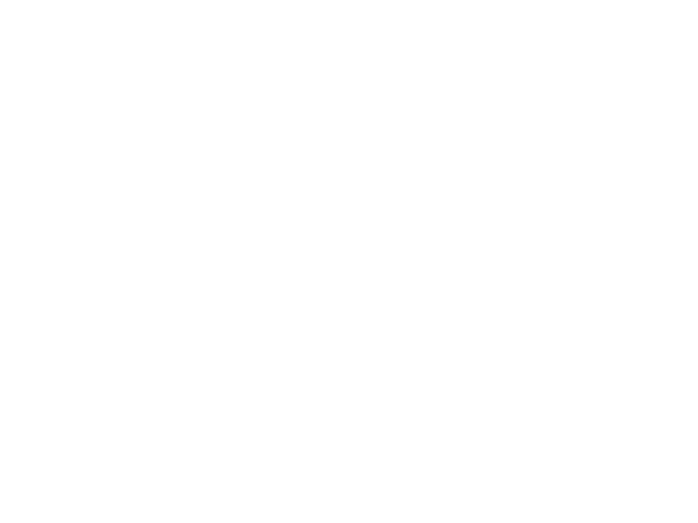

(1.83416^e12345) + (1.83416^e12348) - (1.83416^e12357) + (1.83416^e12378) + (1.83416^e12456) - (1.83416^e12468) + (1.83416^e12567) + (1.83416^e12678) + (0.49884^e13456) + (0.49884^e13457) - (0.49884^e13468) - (0.49884^e13478) + (0.49884^e13567) + (0.49884^e13678) + (0.49884^e14567) + (0.49884^e14678) + (1.99263^e23456) + (1.99263^e23457) - (1.99263^e23468) - (1.99263^e23478) + (1.99263^e23567) + (1.99263^e23678) + (1.99263^e24567) + (1.99263^e24678)
(1.01216^e12345) + (1.01216^e12348) - (1.01216^e12357) + (1.01216^e12378) + (1.01216^e12456) - (1.01216^e12468) + (1.01216^e12567) + (1.01216^e12678) + (2.10344^e13456) + (2.10344^e13457) - (2.10344^e13468) - (2.10344^e13478) + (2.10344^e13567) + (2.10344^e13678) + (2.10344^e14567) + (2.10344^e14678) - (1.25343^e23456) - (1.25343^e23457) + (1.25343^e23468) + (1.25343^e23478) - (1.25343^e23567) - (1.25343^e23678) - (1.25343^e24567) - (1.25343^e24678)


(-2, 2)

In [20]:
%matplotlib notebook
plt.figure()

p1 = up(rand_dp())
p2 = up(rand_dp())
L1 = p1^p2^n1^n2^n3
print(L1)

p3 = up(rand_dp())
p4 = up(rand_dp())
L2 = p3^p4^n1^n2^n3
print(L2)

xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, L1)
img2 = visualise_conic(xs, ys, L2)
plt.contour(xs, ys, img1, [0])
plt.contour(xs, ys, img2, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))

In [21]:
to_op_rep((to_ip_rep(L1)^to_ip_rep(L2)))

(3.35314^e1345) + (3.35314^e1348) - (3.35314^e1357) + (3.35314^e1378) + (3.35314^e1456) - (3.35314^e1468) + (3.35314^e1567) + (3.35314^e1678) - (4.31585^e2345) - (4.31585^e2348) + (4.31585^e2357) - (4.31585^e2378) - (4.31585^e2456) + (4.31585^e2468) - (4.31585^e2567) - (4.31585^e2678) - (4.81662^e3456) + (4.81662^e3468) - (4.81662^e3567) - (4.81662^e3678)

In [22]:
(p2^n1^n2^n3)**2

0

<IPython.core.display.Javascript object>


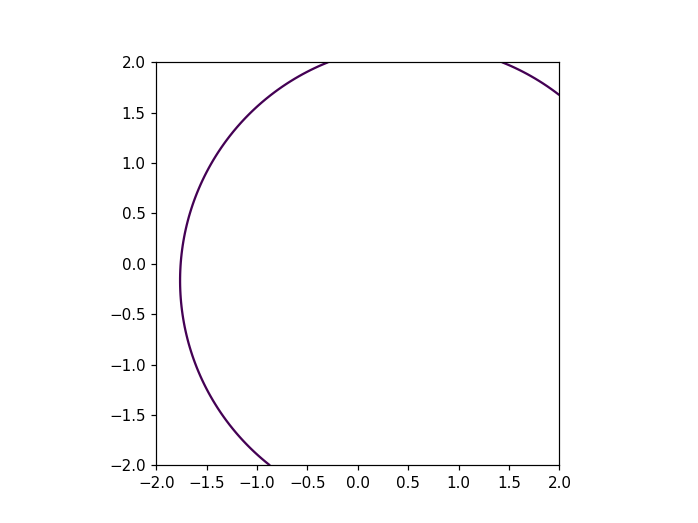

-(9.23984^e12345) - (9.23984^e12348) + (5.99089^e12356) + (15.23072^e12357) - (5.99089^e12368) - (15.23072^e12378) - (15.23072^e12456) - (5.99089^e12457) + (15.23072^e12468) + (5.99089^e12478) - (21.22161^e12567) - (21.22161^e12678) + (0.99487^e13456) + (0.99487^e13457) - (0.99487^e13468) - (0.99487^e13478) + (0.99487^e13567) + (0.99487^e13678) + (0.99487^e14567) + (0.99487^e14678) + (3.40201^e23456) + (3.40201^e23457) - (3.40201^e23468) - (3.40201^e23478) + (3.40201^e23567) + (3.40201^e23678) + (3.40201^e24567) + (3.40201^e24678)


In [23]:
%matplotlib notebook
fig,ax =  plt.subplots(1,1)
#plt.figure()
C1 = up(rand_dp())^up(rand_dp())^up(rand_dp())^nm^nx
print(C1)
xs = np.linspace(-2.0,2.0,100)
ys = np.linspace(-2.0,2.0,100)
img1 = visualise_conic(xs, ys, C1)
plt.contour(xs, ys, img1, [0])
plt.xlim((-2,2))
plt.ylim((-2,2))
ax.set_aspect('equal', 'box')

In [24]:
%%timeit
rand_con*rand_con_2

78.8 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
